![Title](Images/cisco.png)

# Lab - San Francisco Crime 
### Objectives

Demonstrate your knowledge of the Data Analysis Lifecycle using a given set of data and the tools, Python and Jupyter Notebook

#### Part 1: Import the Python Packages
#### Part 2: Load the Data
#### Part 3: Prepare the Data
#### Part 4: Analyze the Data
#### Part 5: Visualize the Data

### Background / Scenario

In this lab, you will import some Python packages required to analyze a data set containing San Francisco crime information. You will then use Python and Jupyter Notebook to prepare this data for analysis, analyze it, graph it, and communicate your findings.

### Required Resources

* 1 PC with Internet access
* Raspberry Pi version 2 or higher
* Python libraries: pandas, numpy, matplotlib, folium, datetime, and csv
* Datafiles: Map-Crime_Incidents-Previous_Three_Months.csv

## Part 1: Import the Python Packages

In this part, you will import the following Python packages necessary for the rest of this lab.
#### numpy 
NumPy is the fundamental package for scientific computing with Python. It contains among other things: a powerful N-dimensional array object and sophisticated (broadcasting) functions.
#### pandas 
Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
#### matplotlib
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
#### folium 
Folim is a library to create interactive map.

In [1]:
# Code cell 1
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import folium 

## Part 2: Load the Data

In this part, you will load the San Francisco Crime Dataset and the Python packages necessary to analyze and visualize it.

#### Step 1: Load the San Francisco Crime data into a data frame.
In this step, you will import the San Francisco crime data from a comma separated values (csv) file into a data frame.

In [2]:
# code cell 2
# This should be a local path
dataset_path = './Data/Map-Crime_Incidents-Previous_Three_Months.csv'

# read the original dataset (in comma separated values format) into a DataFrame
SF = pd.read_csv(dataset_path)

To view the first five lines of the csv file, the Linux command `head` is used.

In [3]:
# code cell 3
#!head -n 5 ./Data/Map-Crime_Incidents-Previous_Three_Months.csv
!powershell -command "Get-Content ./Data/Map-Crime_Incidents-Previous_Three_Months.csv | Select -First 5"

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417392830334,37.7909741243888,"(37.7909741243888, -122.417392830334)"
,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404417620748,37.7963018736036,"(37.7963018736036, -122.404417620748)"
,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406958660602,37.7894347630337,"(37.7894347630337, -122.406958660602)"
,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419671780296,37.7650501214965,"(37.7650501214965, -122.419671780296)"


#### Step 2: View the imported data.

a) By typing the name of the data frame variable into a cell, you can visualize the top and bottom rows in a structured way.

In [4]:
# Code cell 4
pd.set_option('display.max_rows', 10) #Visualize 10 rows 
SF

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)"
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)"
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)"
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)"
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)"
...,...,...,...,...,...,...,...,...,...,...,...,...
30755,NaN,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,06/01/2014 07:00:00 AM +0000,15:30,SOUTHERN,"ARREST, BOOKED",900.0 Block of MARKET ST,-122.408052,37.783957,"(37.7839574642528, -122.408051765969)"
30756,NaN,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,06/01/2014 07:00:00 AM +0000,16:00,NORTHERN,"ARREST, CITED",POLK ST / MCALLISTER ST,-122.418601,37.780261,"(37.7802607511488, -122.418600974625)"
30757,NaN,ASSAULT,BATTERY,Sunday,06/01/2014 07:00:00 AM +0000,15:00,TENDERLOIN,"ARREST, CITED",0.0 Block of JONES ST,-122.412122,37.781379,"(37.7813786419025, -122.412121608136)"
30758,NaN,ASSAULT,ASSAULT WITH CAUSTIC CHEMICALS,Sunday,06/01/2014 07:00:00 AM +0000,15:20,CENTRAL,NONE,200.0 Block of GEARY ST,-122.407434,37.787494,"(37.7874944447786, -122.407434204569)"


b) Use the function `columns` to view the name of the variables in the DataFrame.

In [5]:
# Code cell 5
SF.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location'],
      dtype='object')

How many variables are contained in the SF data frame (ignore the Index)?

c) Use the function `len` to determine the number of rows in the dataset.

In [6]:
# Code cell 6
len(SF)

30760

## Part 3: Prepare the Data

Now that you have the data loaded into the work environment and determined the analysis you want to perform, it is time to prepare the data for analysis.


#### Step 1: Extract the month and day from the Date field.

`lambda` is a Python keyword to define so-called *anonymous functions*. `lambda` allows you to specify a function in one line of code, without using `def` and without defining a specific name for it. The syntax for a `lambda` expression is :

`lambda` *parameters* : *expression*.

In the following, the `lambda` function is used to create an inline function that selects only the month digits from the Date variable, and `int` to transform a string representation into an integer. Then, the *pandas* function `apply` is used to apply this function to an entire column (in practice, `apply` implicitly defines a `for` loop and passes one by one the rows to the `lambda` function).  The same procedure can be done for the Day. 

In [7]:
# Code cell 7
SF['Month'] = SF['Date'].apply(lambda row: int(row[0:2]))
SF['Day'] = SF['Date'].apply(lambda row: int(row[3:5]))

To verify that these two variables were added to the SF data frame, use the `print` function to print some values from these columns, and `type` to check that these new columns contain indeed numerical values.

In [8]:
# Code cell 8
print(SF['Month'][0:2])
print(SF['Day'][0:2])

0    8
1    8
Name: Month, dtype: int64
0    31
1    31
Name: Day, dtype: int64


In [9]:
# Code cell 9
print(type(SF['Month'][0]))

<class 'numpy.int64'>


#### Step 2: Remove variables from the SF data frame.

a) The column `IncidntNum` contains many cells with NaN. In this instance, the data is missing. Furthermore, the `IncidntNum` is not providing any value to the analysis. The column can be dropped from the data frame. One way to remove unwanted variables in a  data frame is by using the `del` function.

In [10]:
# Code cell 10
del SF['IncidntNum']

b) Similarly, the `Location` attribute will not be in this analysis. It can be droped from the data frame. 
<p>Alternatively, you can use the `drop` function on the data frame, specifying that the *axis* is the 1 (0 for rows), and that the command does not require an assignment to another value to store the result (*inplace = True* ).

In [11]:
# Code cell 11
SF.drop('Location', axis=1, inplace=True )

c) Check that the columns have been removed.

In [12]:
# Code cell 12
SF.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Month', 'Day'],
      dtype='object')

## Part 4: Analyze the Data

Now that the data frame has been prepared with the data, it is time to analyze the data. 

#### Step 1: Summarize variables to obtain statistical information.

a) Use the function `value_counts` to summarize the number of crimes committed by type, then `print` to display the contents of the *CountCategory* variable.

In [13]:
# Code cell 13
CountCategory = SF['Category'].value_counts()
print(CountCategory)

LARCENY/THEFT                 8205
OTHER OFFENSES                4004
NON-CRIMINAL                  3653
ASSAULT                       2518
VEHICLE THEFT                 1885
                              ... 
SEX OFFENSES, NON FORCIBLE       5
BAD CHECKS                       3
PORNOGRAPHY/OBSCENE MAT          1
GAMBLING                         1
BRIBERY                          1
Name: Category, Length: 36, dtype: int64


b) By default, the counts are ordered in descending order. The value of the optional parameter *ascending* can be set to *True* to reverse this behavior.

In [14]:
# Code cell 14
len(SF['Category'].value_counts(ascending=True))

36

What type of crime was committed the most?

c) By nesting the two functions into one command, you can accomplish the same result with one line of
code.

In [15]:
# Code cell 15
print(SF['Category'].value_counts(ascending=True))

BRIBERY                          1
GAMBLING                         1
PORNOGRAPHY/OBSCENE MAT          1
BAD CHECKS                       3
SEX OFFENSES, NON FORCIBLE       5
                              ... 
VEHICLE THEFT                 1885
ASSAULT                       2518
NON-CRIMINAL                  3653
OTHER OFFENSES                4004
LARCENY/THEFT                 8205
Name: Category, Length: 36, dtype: int64


**Challenge Question**: Which PdDistrict had the most incidents of reported crime? Provide the Python command(s)
used to support your answer.

In [16]:
# code cell 16
# Possible code for the challenge question
print(SF['PdDistrict'].value_counts(ascending=True))

RICHMOND      1622
PARK          1800
TARAVAL       2038
TENDERLOIN    2449
INGLESIDE     2613
BAYVIEW       2970
NORTHERN      3205
CENTRAL       3867
MISSION       4011
SOUTHERN      6185
Name: PdDistrict, dtype: int64


#### Step 2: Subset the data into smaller data frames.

a) Logical indexing can be used to select only the rows for which a given condition is satisfied. For example, the following code extracts only the crimes committed in August, and stores the result in a new DataFrame.

In [17]:
# Code cell 17
AugustCrimes = SF[SF['Month'] == 8]
AugustCrimes

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...
9715,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Friday,08/01/2014 07:00:00 AM +0000,19:55,MISSION,NONE,1100.0 Block of POTRERO AV,-122.406497,37.754279,8,1
9716,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Friday,08/01/2014 07:00:00 AM +0000,22:47,RICHMOND,NONE,1500.0 Block of BRODERICK ST,-122.441458,37.784427,8,1
9717,ASSAULT,THREATS AGAINST LIFE,Friday,08/01/2014 07:00:00 AM +0000,23:55,BAYVIEW,NONE,400.0 Block of TUNNEL AV,-122.401364,37.709748,8,1
9718,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Friday,08/01/2014 07:00:00 AM +0000,23:38,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,8,1


How many crime incidents were there for the month of August? 

How many burglaries were reported in the month of August?

In [18]:
# code cell 18
# Possible code for the question: How many burglaries were reported in the month of August?
AugustCrimes = SF[SF['Month'] == 8]
AugustCrimesB = SF[SF['Category'] == 'BURGLARY']
len(AugustCrimesB)

1257

b) To create a subset of the SF data frame for a specific day, use the function `query` operand to compare Month and Day at the same time.

In [19]:
# Code cell 19
Crime0704 = SF.query('Month == 7 and Day == 4')
Crime0704

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
19087,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,22:30,SOUTHERN,NONE,8TH ST / MISSION ST,-122.413161,37.777457,7,4
19088,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,18:15,SOUTHERN,NONE,CLEMENTINA ST / 9TH ST,-122.412174,37.774201,7,4
19089,BURGLARY,"BURGLARY,RESIDENCE UNDER CONSTRT, FORCIBLE ENTRY",Friday,07/04/2014 07:00:00 AM +0000,00:50,TARAVAL,NONE,0.0 Block of MENDOSA AV,-122.466414,37.748011,7,4
19090,NON-CRIMINAL,LOST PROPERTY,Friday,07/04/2014 07:00:00 AM +0000,19:00,PARK,NONE,CASTRO ST / 16TH ST,-122.435318,37.764102,7,4
19091,ASSAULT,BATTERY,Friday,07/04/2014 07:00:00 AM +0000,21:00,NORTHERN,NONE,1000.0 Block of POLK ST,-122.419783,37.785894,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...
19423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,19:25,SOUTHERN,NONE,THE EMBARCADEROSOUTH ST / BRYANT ST,-122.388007,37.787103,7,4
19424,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Friday,07/04/2014 07:00:00 AM +0000,11:00,INGLESIDE,NONE,0.0 Block of FRATESSA CT,-122.399762,37.716129,7,4
19425,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,20:30,SOUTHERN,NONE,THE EMBARCADEROSOUTH ST / HARRISON ST,-122.388486,37.789573,7,4
19426,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,08:00,SOUTHERN,NONE,11TH ST / HARRISON ST,-122.412483,37.770631,7,4


In [20]:
# Code cell 20
SF.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Month', 'Day'],
      dtype='object')

## Part 5: Present the Data

Visualization and presentation of the data provides an instant overview that might not be apparent by simply
looking at the raw data. The SF data frame contains longitude and latitude coordinates that can be used to
plot the data.

#### Step 1: Plot a graph of the SF data frame using the X and Y variables.

a) Use the `plot()` function to plot the SF data frame. Use the optional parameter to plot the graph in red and setting the marker shape to a circle using *ro* .

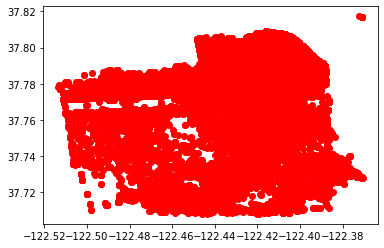

In [21]:
# Code cell 21
plt.plot(SF['X'],SF['Y'], 'ro')
plt.show()

b) Identify the number of police department district, then build the dictionary *pd_districts* to associate their string to an integer.

In [22]:
# Code cell 22
pd_districts = np.unique(SF['PdDistrict'])
pd_districts_levels = dict(zip(pd_districts, range(len(pd_districts))))
pd_districts_levels

{'BAYVIEW': 0,
 'CENTRAL': 1,
 'INGLESIDE': 2,
 'MISSION': 3,
 'NORTHERN': 4,
 'PARK': 5,
 'RICHMOND': 6,
 'SOUTHERN': 7,
 'TARAVAL': 8,
 'TENDERLOIN': 9}

c) Use `apply` and `lambda` to add the police deparment integer id to a new column of the DataFrame 

In [23]:
# Code cell 23
SF['PdDistrictCode'] = SF['PdDistrict'].apply(lambda row: pd_districts_levels[row])

d) Use the newly create *PdDistrictCode* to automatically change the color

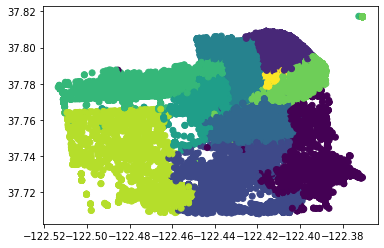

In [24]:
# Code cell 24
plt.scatter(SF['X'], SF['Y'], c=SF['PdDistrictCode'])
plt.show()

#### Step 2: Add Map packages to enhance the plot.

In Step 1, you created a simple plot that displays where crime incidents took place in SF County. This plot is
useful, but `folium` provides additional functions that will allow you to overlay this plot onto an OpenStreet map. 

a) `Folium` requires the color of the marker to be specified using an hexadecimal value. For this reason, we use the *colors* package, and select the necessary colors.

In [25]:
# Code cell 25
from matplotlib import colors
districts = np.unique(SF['PdDistrict'])
print(list(colors.cnames.values())[0:len(districts)]) 

['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF']


b) Create a color dictionary for each police department district.

In [26]:
# Code cell 26
color_dict = dict(zip(districts, list(colors.cnames.values())[0:-1:len(districts)])) 
color_dict

{'BAYVIEW': '#F0F8FF',
 'CENTRAL': '#8A2BE2',
 'INGLESIDE': '#00FFFF',
 'MISSION': '#FF8C00',
 'NORTHERN': '#FF1493',
 'PARK': '#F8F8FF',
 'RICHMOND': '#4B0082',
 'SOUTHERN': '#FAFAD2',
 'TARAVAL': '#B0C4DE',
 'TENDERLOIN': '#9370DB'}

c) Create the map using the middle coordinates of the SF Data to center the map (using `mean`). To reduce the computation time,  *plotEvery* is used to limit amount of plotted data. Set this value to 1 to plot all the rows (might take a long time to visualize the map).

In [27]:
# Code cell 27
# Create map
map_osm = folium.Map(location=[SF['Y'].mean(), SF['X'].mean()], zoom_start = 12)
plotEvery = 50
obs = list(zip( SF['Y'], SF['X'], SF['PdDistrict'])) 

for el in obs[0:-1:plotEvery]: 
    
    folium.CircleMarker(el[0:2], color=color_dict[el[2]], fill_color=el[2],radius=10).add_to(map_osm)
    

In [28]:
# Code cell 28
map_osm

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>